# WNBA Machine Learning: K-Means Clustering
## Clustering to Find the Best Teams & Simulating a Data-Driven "Playoff" Between the Best WNBA Players Across Time

I had a vision to design the greatest WNBA game of all time, so I used K-Means Clustering and data analysis to create the best teams comprised of WNBA players of all time. After I created the best teams, I simulated a data-driven "play-off" between the top two ranking teams that I created through clustering. 

### **Contents**

- [**Import Libraries**](#Import-Libraries)
- [**Load Data**](#Load-Data)
- [**Clean Data**](#Clean-Data)
  - [Function](#Function)
  - [Assess Duplicates](#Assess-Duplicates)
  - [Assess Nulls](#Assess-Nulls)
  - [Check Datatypes](#Check-datatypes)
  - [Assess Player Positions](#Assess-Player-Positions)
  - [Divide WNBA DataFrame into separate position DataFrames](#Divide-wnba-DataFrame-into-separate-position-DataFrames)
- [**Exploring Performance per Player Position**](#Exploring-Performance-per-Player-Position)
  - [Functions](#Functions)
  - [Distribution of Features per Position](#Distribution-of-Features-per-Position)
  - [Mean/Median points per game (`PTS`), per position](#Mean/Median-points-per-game-(PTS),-per-position)
  - [Mean/Median field goal % per game (`FG%`), per position](#Mean/Median-field-goal-%-per-game-(FG%),-per-position)
  - [Mean/Median total rebounds per game (`TRB`), per position](#Mean/Median-total-rebounds-per-game-(TRB),-per-position)
  - [Mean/Median steals per game (`STL`), per position](#Mean/Median-steals-per-game-(STL),-per-position)
  - [Mean/Median blocks per game (`BLK`), per position](#Mean/Median-blocks-per-game-(BLK),-per-position)
  - [Mean/Median assists per game (`AST`), per position](#Mean/Median-assists-per-game-(AST),-per-position)
- [**Modeling**](#Modeling)
  - [Functions](#Functions)
  - [Forward KMeans](#Forward-KMeans)
  - [Center KMeans](#Center-KMeans)
  - [Forward-Center KMeans](#Forward-Center-KMeans)
  - [Guard KMeans](#Guard-KMeans)
  - [Forward-Guard KMeans](#Forward-Guard-KMeans)
- [**Merge DataFrames to View New Data Generated: `wnba_all`**](#Merge-DataFrames-to-View-New-Data-Generated:-wnba_all)
- [**The Results! Let’s See the Team Rosters**](#The-Results!-Let’s-See-the-Team-Rosters.)
  - [Function](#Function)
  - [Team 1: The Best](#Team-1:-The-Best)
  - [Team 2: Second Best](#Team-2:-Second-Best)
  - [Team 3: Third Best](#Team-3:-Third-Best)
  - [Team 4: Fourth Best](#Team-4:-Fourth-Best)
  - [Team 5: Fifth Best](#Team-5:-Fifth-Best)
  - [Team 6: Sixth Best](#Team-6:-Sixth-Best)
  - [Team 7: Seventh Best](#Team-7:-Seventh-Best)
  - [Team 8: Eighth Best](#Team-8:-Eighth-Best)
- [**Let the Ultimate WNBA (Data-Driven) Game Begin! (Or, what it would look like if the top 2 teams played against each other)**](#Let-the-Ultimate-WNBA-(Data-Driven)-Game-Begin!)
  - [Function](#Function)
  - [Veteran Players On Each Team](#Veteran-Players-On-Each-Team)
  - [Which-two-players-tip-off-the-game?](Which-two-players-tip-off-the-game?)
  - [Offensive Rebounds](#Offensive-Rebounds)
  - [Defensive Rebounds](#Defensive-Rebounds)
  - [Three-Pointer Suspense: Which team makes the most three-pointers?](#Three-Pointer-Suspense:-Which-team-makes-the-most-three-pointers?)
  - [***AND THE WINNER IS...***](#And-the-Winner-is...)


# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, k_means
from sklearn.metrics import silhouette_score
import matplotlib
import matplotlib.mlab as mlab
import numpy as np 
import scipy.stats
from scipy.stats import norm

matplotlib.style.use('ggplot')

# Load Data

In [2]:
# Set preferences to show 25 columns
pd.set_option('display.max_columns', 30)

In [3]:
# Read in data
wnba = pd.read_csv('./data/WNBA_ALL.csv')

# Drop unnamed column
wnba.drop(columns='Unnamed: 0', inplace=True)

# Print DF shape
print("Shape", wnba.shape)

# Show head
wnba.head()

Shape (910, 26)


,name,position,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Farhiya Abdi,Forward,52,5,9.6,1.2,3.1,0.383,0.2,0.8,0.25,1.0,2.3,0.426,0.3,0.4,0.682,0.2,0.8,1.0,0.4,0.2,0.1,0.4,1.2,2.9
1,Tajama Abraham,Center,40,5,11.7,1.3,3.5,0.379,0.0,0.0,NaN,1.3,3.5,0.379,0.9,1.3,0.642,0.9,1.0,1.9,0.3,0.4,0.3,1.4,2.0,3.5
2,Svetlana Abrosimova,Forward,263,153,24.2,3.3,8.4,0.395,0.9,2.5,0.35,2.4,5.9,0.415,1.6,2.5,0.654,1.2,2.9,4.1,2.1,1.3,0.2,2.4,2.3,9.2
3,Natalie Achonwa,Forward,120,68,18.2,3.0,5.5,0.542,0.0,0.0,NaN,3.0,5.5,0.542,1.5,2.0,0.768,1.5,2.7,4.2,0.8,0.6,0.5,1.0,2.2,7.5
4,Jessica Adair,Center,51,1,9.9,1.3,2.8,0.454,0.0,0.0,NaN,1.3,2.8,0.454,1.1,1.7,0.625,1.1,1.6,2.7,0.3,0.2,0.4,0.8,1.6,3.6


# Clean Data

### Function

In [4]:
# Make bar plot
def bar_plot(x, y, title, color):    
    
    # Set up barplot 
    plt.figure(figsize=(9,5))
    g=sns.barplot(x, y, color = color)    
    ax=g

    # Label the graph
    plt.title(title, fontsize = 15)
    plt.xticks(fontsize = 10)

    # Enable bar values
    # Code modified from http://robertmitchellv.com/blog-bar-chart-annotations-pandas-mpl.html
    # create a list to collect the plt.patches data
    totals = []

    # find the values and append to list
    for p in ax.patches:
        totals.append(p.get_width())

    # set individual bar lables using above list
    total = sum(totals)

    # set individual bar lables using above list
    for p in ax.patches:
        # get_width pulls left or right; get_y pushes up or down
        ax.text(p.get_width()+.3, p.get_y()+.38, \
                int(p.get_width()), fontsize=10)

### Assess Duplicates

In [5]:
# There are two players with the same name. 
pd.concat(i for _, i in wnba.groupby("name") if len(i) > 1)

,name,position,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
132,Michelle Campbell,Center,13,0,4.0,0.4,1.2,0.333,0.0,0.1,0.0,0.4,1.1,0.357,0.3,0.5,0.667,0.0,0.6,0.6,0.2,0.0,0.1,0.5,0.5,1.1
133,Michelle Campbell,Center,31,0,7.7,0.5,1.6,0.314,0.0,0.0,NaN,0.5,1.6,0.314,0.7,1.0,0.733,0.7,0.9,1.5,0.2,0.2,0.2,0.5,1.3,1.7
134,Michelle Campbell,Forward,13,0,4.0,0.4,1.2,0.333,0.0,0.1,0.0,0.4,1.1,0.357,0.3,0.5,0.667,0.0,0.6,0.6,0.2,0.0,0.1,0.5,0.5,1.1
135,Michelle Campbell,Forward,31,0,7.7,0.5,1.6,0.314,0.0,0.0,NaN,0.5,1.6,0.314,0.7,1.0,0.733,0.7,0.9,1.5,0.2,0.2,0.2,0.5,1.3,1.7


In [6]:
# These players are duplicates, drop by index number 
wnba.drop([133, 134], inplace=True)

In [7]:
# Print DF shape
print("Shape", wnba.shape)

Shape (908, 26)


### Assess Nulls

In [8]:
# Percentage columns with 0% are null, so I'll fill them with 0 to indicate 0%
wnba.isnull().sum()

name          0
position      0
G             0
GS            0
MP            0
FG            0
FGA           0
FG%          12
3P            0
3PA           0
3P%         149
2P            0
2PA           0
2P%          19
FT            0
FTA           0
FT%          62
ORB           0
DRB           0
TRB           0
AST           0
STL           0
BLK           0
TOV           0
PF            0
PTS           0
dtype: int64

In [9]:
# Fill na with 0
wnba = wnba.fillna(0)

In [10]:
# Check all nulls are gone
wnba.isnull().sum().sum()

0

### Check datatypes

In [11]:
# Check datatypes
wnba.dtypes

name         object
position     object
G             int64
GS            int64
MP          float64
FG          float64
FGA         float64
FG%         float64
3P          float64
3PA         float64
3P%         float64
2P          float64
2PA         float64
2P%         float64
FT          float64
FTA         float64
FT%         float64
ORB         float64
DRB         float64
TRB         float64
AST         float64
STL         float64
BLK         float64
TOV         float64
PF          float64
PTS         float64
dtype: object

### Assess player positions

The values in the `position` column are duplicated. Create five clean categories. 

In [12]:
# Check unique values in `position` column
wnba['position'].unique()

array(['Forward', 'Center', 'Forward-Center', 'Guard', 'Forward-Guard',
       'Guard-Forward', 'Center-Forward', 'Forward-'], dtype=object)

In [13]:
# Replace 'forward-' with 'forward'
wnba['position'] = wnba['position'].replace(['Forward-'], 'Forward')

# Replace 'Center-Forward' with 'Forward-Center'iley
wnba['position'] = wnba['position'].replace(['Center-Forward'], 'Forward-Center')

# Replace 'Guard-Forward' with 'Forward-Center'
wnba['position'] = wnba['position'].replace(['Guard-Forward'], 'Forward-Guard')

In [14]:
# Check that 5 unique values are in `position` column
wnba['position'].unique()

array(['Forward', 'Center', 'Forward-Center', 'Guard', 'Forward-Guard'],
      dtype=object)

### Divide `wnba` DataFrame into separate position DataFrames

In [15]:
# Subset the data according to positions
forward = wnba[wnba['position']=='Forward']
center = wnba[wnba['position']=='Center']
forward_center = wnba[wnba['position']=='Forward-Center']
guard = wnba[wnba['position']=='Guard']
forward_guard = wnba[wnba['position']=='Forward-Guard']


# See shapes
print(f'Forward shape: {forward.shape}')
print(f'Center shape: {center.shape}')
print(f'Forward-Center shape: {forward_center.shape}')
print(f'Guard shape: {guard.shape}')
print(f'Forward-Guard shape: {forward_guard.shape}')

Forward shape: (263, 26)
Center shape: (157, 26)
Forward-Center shape: (72, 26)
Guard shape: (359, 26)
Forward-Guard shape: (57, 26)


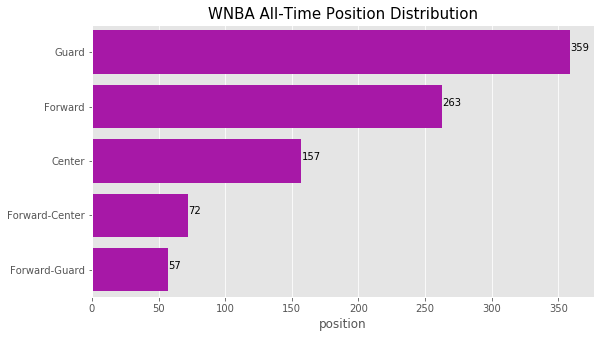

In [16]:
# Visualize position distribution
bar_plot(wnba['position'].value_counts(), wnba['position'].value_counts().index, "WNBA All-Time Position Distribution", 'm')

# Exploring Performance per Player Position

The five positions of the WNBA as documented by Basketball-Reference are: 
  1. Forward
  2. Center
  3. Forward-Center
  4. Guard
  5. Forward-Guard

In this section, I'll use exploratory data analysis to learn more about each of these positions. (Exciting ah!)

### Functions

In [17]:
# Get Position Averages per Feature
def get_position_averages(col):
    positions = forward, forward_center, center, guard, forward_guard
    totals = []
    for position in positions:
        mean = position[col].mean()
        median = position[col].median()
        totals.append([mean, median])
    position_df = pd.DataFrame(totals, index=['forward', 'forward_center', 'center', 'guard', 'forward_guard'])
    position_df.columns = ['mean_values','median_values']
    return position_df

### Distribution of Features per Position

In [18]:
features = ['G', 'GS', 'MP', 'FG%', '3P%', '2P%', 'FT%', 'TRB', 'AST', 'STL', 'BLK', 'PTS']

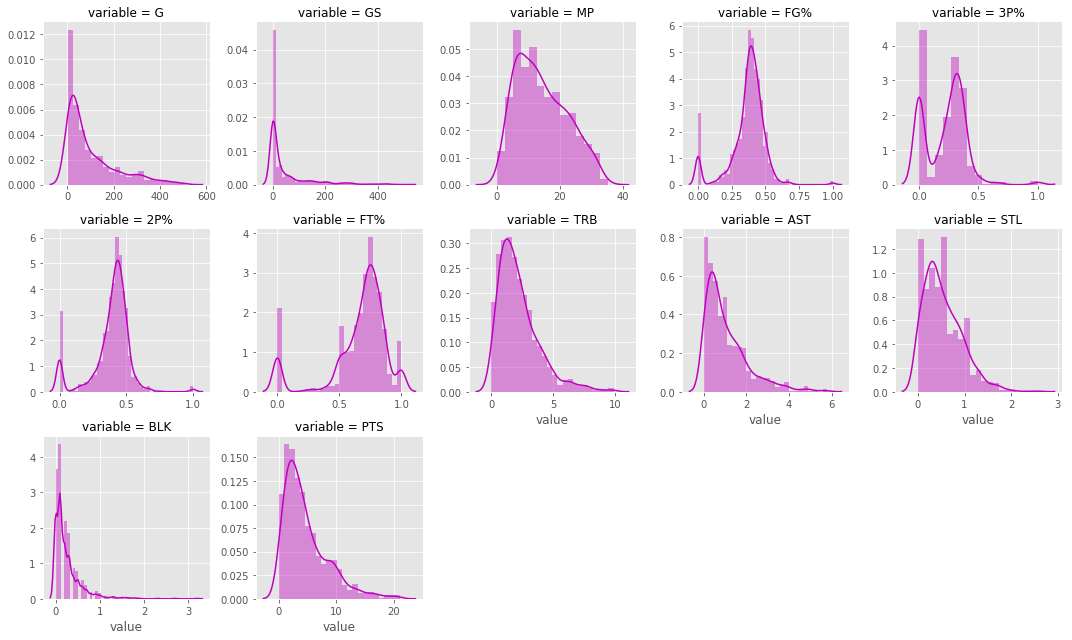

In [19]:
# Code modified from 
#https://stackoverflow.com/questions/50952133/distribution-probabilities-for-each-column-data-frame-in-one-plot
dfm = pd.melt(wnba, value_vars=features)
gf = sns.FacetGrid(dfm, col_wrap=5, col='variable', sharex=False, sharey=False)
gf = gf.map(sns.distplot, 'value', color='m');

Since I want to create the best teams on the WNBA, I want to take into consideration outliers. Therefore, even though the distribution of performance per position is skewed almost across the board, I'm tempted to use the mean over the median. So I'll compare mean and median performance in the cells below to see if there are any major differences in ranking. 

----
Below I calculate the mean and median performance of performance features per position. And based off of the calculations below, I have determined the top performing features per position (see cell directly below). I'll use these features when I perform KMeans modeling on each position. 

**Important Note**: None of the features that I'll use to create the best teams will involve "Games Played" (`G`), since I want to compile teams with rookie _and_ veteran players. 

In [20]:
# Forward Guard highest average performance categories
forward_features = ['FG%', 'TRB']

# Center highest average performance categories
center_features = ['BLK', 'FG%', 'TRB']

# Forward-Center highest average performance categories
forward_center_features = ['TRB','FG%', 'PTS']

# Guard highest average performance categories
guard_features = ['AST', 'PTS', 'STL']

# Forward-Guard highest average performance categories
forward_guard_features = ['AST', 'PTS', 'STL']

### Mean/Median points per game (`PTS`), per position

In [21]:
# Get mean and median performance in points per game for all players in each position
get_position_averages('PTS').sort_values('median_values', ascending=False)

,mean_values,median_values
forward_guard,5.622807,4.20
forward_center,5.301389,4.15
forward,4.648669,3.60
guard,4.661838,3.50
center,3.971338,3.10


### Mean/Median field goal % per game (`FG%`), per position

In [22]:
# Get mean and median performance in field goal % per game for all players in each position
get_position_averages('FG%').sort_values('median_values', ascending=False)

,mean_values,median_values
forward_center,0.430431,0.448
center,0.408713,0.442
forward,0.379175,0.402
forward_guard,0.371807,0.381
guard,0.338591,0.367


### Mean/Median total rebounds per game (`TRB`), per position

In [23]:
# Get mean and median performance in total rebound per game for all players in each position
get_position_averages('TRB').sort_values('median_values', ascending=False)

,mean_values,median_values
forward_center,3.315278,2.9
center,2.669427,2.3
forward,2.597719,2.2
forward_guard,2.224561,1.8
guard,1.548468,1.4


### Mean/Median steals per game (`STL`), per position

In [24]:
# Get mean and median performance in steals per game for all players in each position
get_position_averages('STL').sort_values('median_values', ascending=False)

,mean_values,median_values
guard,0.621170,0.60
forward_guard,0.691228,0.60
forward_center,0.544444,0.45
forward,0.518631,0.40
center,0.318471,0.30


### Mean/Median blocks per game (`BLK`), per position

In [25]:
# Get mean and median performance in blocks per game for all players in each position
get_position_averages('BLK').sort_values('median_values', ascending=False)

,mean_values,median_values
forward_center,0.461111,0.4
center,0.483439,0.3
forward,0.276426,0.2
guard,0.105014,0.1
forward_guard,0.208772,0.1


### Mean/Median assists per game (`AST`), per position

In [26]:
# Get mean and median performance in assists per game for all players in each position
get_position_averages('AST').sort_values('median_values', ascending=False)

,mean_values,median_values
guard,1.571309,1.4
forward_guard,1.177193,0.9
forward,0.814449,0.6
forward_center,0.722222,0.6
center,0.453503,0.3


# Modeling
For all clusters, I ended up choosing `n_clusters=8` since it had relatively high silhouette scores and low inertia for almost all models. I want to keep the number of clusters the same since I'll be making teams out of the tiered clusters. For example, the best performing clusters (where the players are performing the best overall) will be grouped into one team. One team will have five clusters, representing the five positions played on the basketball court.  

### Functions

In [27]:
# Get Cluster Scores
# Code from General Assembly
def get_cluster_scores(X_scaled):
    scores = []
    for k in range(2,15):
        cl = KMeans(n_clusters=k, random_state=42)
        cl.fit(X_scaled)
        inertia = cl.inertia_
        sil = silhouette_score(X_scaled, cl.labels_)
        scores.append([k, inertia, sil])
    score_df = pd.DataFrame(scores)
    score_df.columns = ['k', 'inertia', 'silhouette']
    return score_df

In [28]:
# Plot Cluster Scores
# Code from GA
def plot_cluster_scores():
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].plot(get_cluster_scores(X_scaled).k, get_cluster_scores(X_scaled).inertia)
    axes[0].set_title('Inertia over k')
    axes[1].plot(get_cluster_scores(X_scaled).k, get_cluster_scores(X_scaled).silhouette);
    axes[1].set_title('Silhouette Score over k')

In [29]:
# Get Cluster Means and Medians to determine ranking of teams
# Code modified from GA
def get_centroids(cols, sort_by):   
    centroids = pd.DataFrame(
        ss.inverse_transform(kmeans.cluster_centers_),
        columns = cols)
    centroids['mean'] = centroids.mean(numeric_only=True, axis=1)
    centroids['median'] = centroids.median(numeric_only=True, axis=1)
    return centroids.sort_values(sort_by, ascending=False)

### Forward KMeans

In [30]:
# Scale data
X = forward[forward_features]
ss = StandardScaler()
X_scaled = ss.fit_transform(X)

In [31]:
# Get inertia and silhouette scores for various k-clusters
get_cluster_scores(X_scaled).sort_values('inertia', ascending=True).head(10)

,k,inertia,silhouette
12,14,24.587106,0.379428
11,13,26.377540,0.389651
10,12,28.530013,0.392586
9,11,31.685154,0.397241
8,10,35.207213,0.393577
7,9,39.523044,0.410894
6,8,47.649081,0.390342
5,7,55.652450,0.404042
4,6,66.828763,0.399793
3,5,83.355776,0.387125


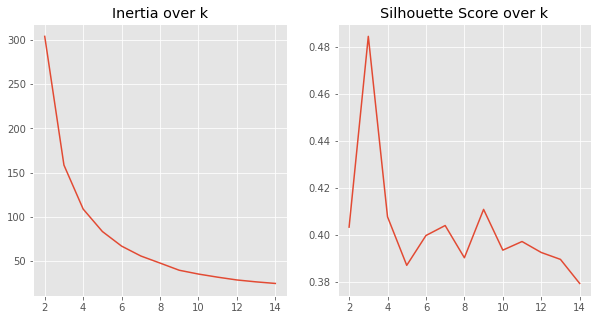

In [32]:
# Plot all inertia and silhouette scores for each k
plot_cluster_scores()

In [33]:
# Instantiate kmeans with 8 clusters, and set random state
kmeans = KMeans(n_clusters=8, random_state=42)
kmeans.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [34]:
# Cluster assignments
cluster_nums = kmeans.labels_

In [35]:
# Was receiving an error, so this reconciles the error when setting new column equal to new value
forward = forward.copy()

# Add new column `clusters` to DataFrame with corresponding cluster assignments for each player
forward.loc[:,'clusters'] = cluster_nums

In [36]:
# See position best performing to plot them below
forward_features

['FG%', 'TRB']

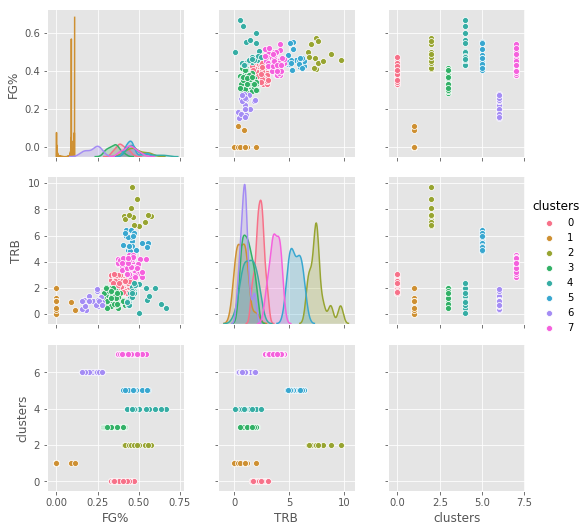

In [124]:
# View how clusters are divided
sns.pairplot(forward, vars=['FG%', 'TRB', 'clusters'], hue='clusters');

In [38]:
# View which players got sorted into clusters, according to `PTS` category
forward[['name', 'G','PTS', 'clusters']].sort_values('PTS', ascending=False).head(10)

,name,G,PTS,clusters
750,Breanna Stewart,101,20.0,2
560,Maya Moore,271,18.4,5
366,Chamique Holdsclaw,279,16.9,2
599,Nneka Ogwumike,218,16.4,2
147,Tamika Catchings,457,16.1,2
787,Tina Thompson,496,15.1,5
232,Candice Dupree,412,14.7,2
900,Sophia Young-Malcolm,301,14.3,5
598,Chiney Ogwumike,95,14.1,2
86,DeWanna Bonner,301,14.1,5


In [39]:
# Calculate average performance for players in each cluster, and compare how each cluster of players perform
forward_centroids = get_centroids(forward_features, 'median')

In [40]:
# Show DataFrame
forward_centroids

,FG%,TRB,mean,median
2,0.481333,7.666667,4.074000,4.074000
5,0.459200,5.585000,3.022100,3.022100
7,0.447731,3.721154,2.084442,2.084442
0,0.395420,2.337681,1.366551,1.366551
4,0.491040,1.376000,0.933520,0.933520
3,0.348880,1.212000,0.780440,0.780440
6,0.225000,0.973684,0.599342,0.599342
1,0.012625,0.700000,0.356312,0.356312


The ranking of mean and median values for each cluster is the same. So I'll stick with this order of clusters to determine my ranking. 

In [41]:
# Re-assign cluster numbers according to performance, ranking 1 being best and 8 being worst
forward['ranking'] = forward['clusters'].map({2:1, 5:2, 7:3, 0:4, 4:5, 3:6, 6:7, 1:8})

In [42]:
# Sneak preview of which players made the top cut in this position
forward[['name', 'G', 'PTS', 'ranking']].sort_values('ranking').head()

,name,G,PTS,ranking
488,Sancho Lyttle,372,9.2,1
425,Jonquel Jones,102,11.3,1
599,Nneka Ogwumike,218,16.4,1
116,Rebekkah Brunson,453,9.2,1
750,Breanna Stewart,101,20.0,1


### Center KMeans

In [43]:
# Scale data
X = center[center_features]
ss = StandardScaler()
X_scaled = ss.fit_transform(X)

In [44]:
# Get inertia and silhouette scores for various k-clusters
get_cluster_scores(X_scaled).sort_values('inertia', ascending=True).head(10)

,k,inertia,silhouette
12,14,38.067861,0.317856
11,13,40.981893,0.319878
10,12,44.732209,0.308800
9,11,48.635170,0.317697
8,10,53.362796,0.308480
7,9,57.863284,0.325623
6,8,65.667308,0.333335
5,7,75.123371,0.330985
4,6,86.196579,0.321756
3,5,100.822930,0.346917


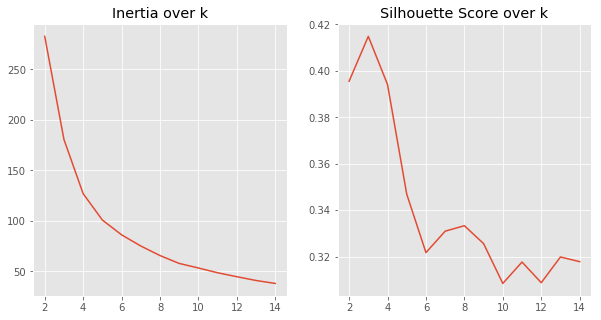

In [45]:
# Plot all inertia and silhouette scores for each k
plot_cluster_scores()

In [46]:
# Instantiate kmeans with 8 clusters, and set random state
kmeans = KMeans(n_clusters=8, random_state=42)
kmeans.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [47]:
# Cluster assignments
cluster_nums = kmeans.labels_

The ranking of mean and median values for each cluster is the same. So I'll stick with this order of clusters to determine my ranking. 

In [48]:
# Was receiving an error, so this reconciles the error when setting new column equal to new value
center = center.copy()

# Add new column `clusters` to DataFrame with corresponding cluster assignments for each player
center.loc[:,'clusters'] = cluster_nums

In [49]:
# See position best performing to plot them below
center_features

['BLK', 'FG%', 'TRB']

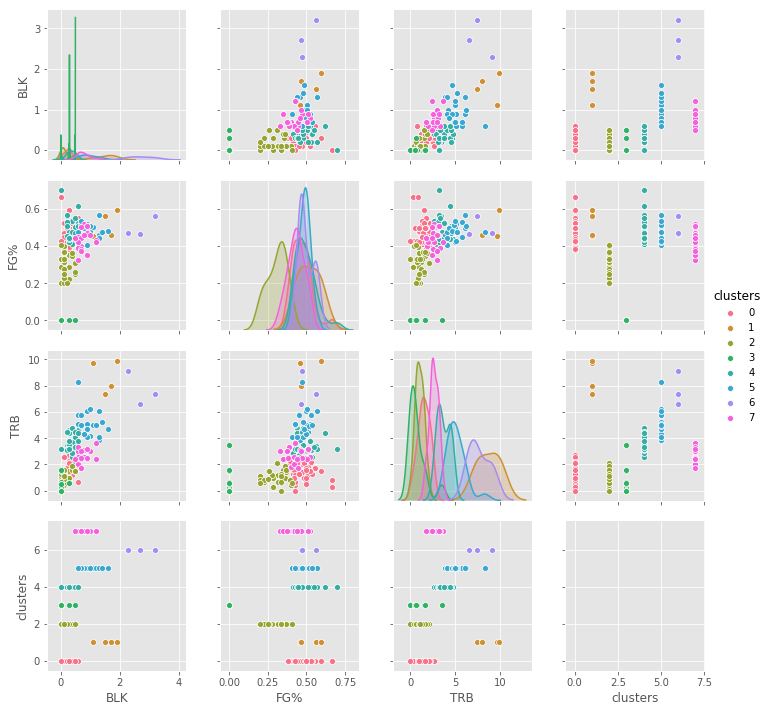

In [125]:
# View how clusters are divided
sns.pairplot(center, vars=['BLK', 'FG%', 'TRB', 'clusters'], hue='clusters');

In [51]:
# View which players got sorted into clusters, according to `PTS` category
center[['name', 'G','PTS', 'clusters']].sort_values('PTS', ascending=False).head(10)

,name,G,PTS,clusters
878,A'ja Wilson,33,20.7,1
155,Tina Charles,297,18.3,1
467,Lisa Leslie,363,17.3,6
130,Liz Cambage,85,17.0,1
315,Brittney Griner,181,16.7,6
265,Sylvia Fowles,306,16.1,1
868,Natalie Williams,221,13.1,5
732,Tangela Smith,463,10.9,5
233,Margo Dydek,323,10.0,6
220,Stefanie Dolson,162,10.0,5


In [52]:
# Calculate average performance for players in each cluster, and compare how each cluster of players perform
center_centroids = get_centroids(center_features, 'median')

In [53]:
# Show DataFrame
center_centroids

,BLK,FG%,TRB,mean,median
6,2.733333,0.499333,7.700000,3.644222,3.188778
1,1.550000,0.518250,8.750000,3.606083,2.578042
5,0.971429,0.484571,5.128571,2.194857,1.583143
7,0.780000,0.434300,2.655000,1.289767,1.034883
4,0.365385,0.496308,3.726923,1.529538,1.012923
0,0.247619,0.472619,1.519048,0.746429,0.609524
2,0.165517,0.309690,1.044828,0.506678,0.408184
3,0.066667,0.000000,0.766667,0.277778,0.172222


The ranking of mean and median values for each cluster similar enough. So I'll stick with this order of clusters to determine my ranking. 

In [54]:
# Re-assign cluster numbers according to performance, ranking 1 being best and 8 being worst
center['ranking'] = center['clusters'].map({6:1, 1:2, 5:3, 7:4, 4:5, 0:6, 2:7, 3:8})

In [55]:
# Sneak preview of which players made the top cut in this position
center[['name', 'G', 'PTS', 'ranking']].sort_values('ranking').head()

,name,G,PTS,ranking
467,Lisa Leslie,363,17.3,1
233,Margo Dydek,323,10.0,1
315,Brittney Griner,181,16.7,1
155,Tina Charles,297,18.3,2
265,Sylvia Fowles,306,16.1,2


### Forward-Center KMeans

In [56]:
# Scale data
X = forward_center[forward_center_features]
ss = StandardScaler()
X_scaled = ss.fit_transform(X)

In [57]:
# Get inertia and silhouette scores for various k-clusters
get_cluster_scores(X_scaled).sort_values('inertia', ascending=True).head(10)

,k,inertia,silhouette
12,14,8.468543,0.335467
11,13,9.288167,0.354900
10,12,11.212833,0.334100
9,11,12.345338,0.359885
8,10,13.661877,0.326939
7,9,15.121011,0.366818
6,8,17.450355,0.386038
5,7,21.020751,0.389989
4,6,27.152304,0.406401
3,5,38.865611,0.434460


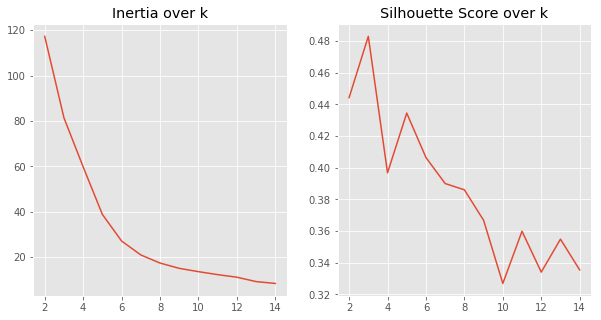

In [58]:
# Plot all inertia and silhouette scores for each k
plot_cluster_scores()

In [59]:
# Instantiate kmeans with 8 clusters, and set random state
kmeans = KMeans(n_clusters=8, random_state=42)
kmeans.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [60]:
# Cluster assignments
cluster_nums = kmeans.labels_

In [61]:
# Was receiving an error, so this reconciles the error when setting new column equal to new value
forward_center = forward_center.copy()

# Add new column `clusters` to DataFrame with corresponding cluster assignments for each player
forward_center.loc[:,'clusters'] = cluster_nums

In [62]:
# See position best performing to plot them below
forward_center_features

['TRB', 'FG%', 'PTS']

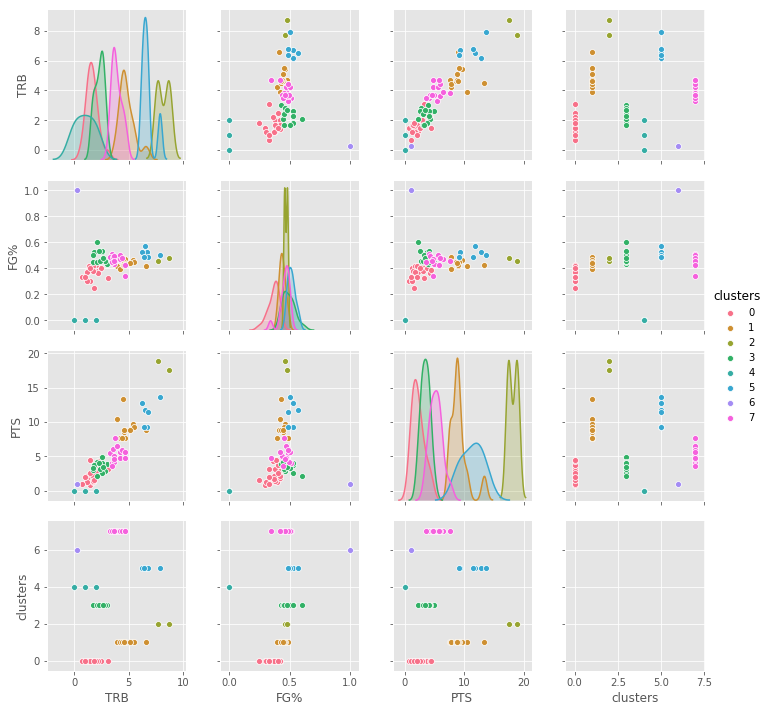

In [126]:
# View how clusters are divided
sns.pairplot(forward_center, vars=['TRB', 'FG%', 'PTS', 'clusters'], hue='clusters');

In [64]:
# View which players got sorted into clusters, according to `PTS` category
forward_center[['name', 'G', 'PTS', 'TRB', 'clusters']].sort_values('PTS', ascending=False).head(10)

,name,G,PTS,TRB,clusters
393,Lauren Jackson,317,18.9,7.7,2
613,Candace Parker,293,17.5,8.7,2
314,Yolanda Griffith,311,13.6,7.9,5
289,Jennifer Gillom,216,13.4,4.5,1
256,Isabelle Fijalkowski,56,12.8,6.2,5
456,Crystal Langhorne,359,11.8,6.5,5
533,Taj McWilliams-Franklin,440,11.4,6.8,5
5,Danielle Adams,174,10.5,3.9,1
535,Chasity Melvin,393,9.7,5.4,1
209,Erika de Souza,329,9.3,6.7,5


In [65]:
# Calculate average performance for players in each cluster, and compare how each cluster of players perform
forward_center_centroids = get_centroids(forward_center_features, 'median')

In [66]:
# Show DataFrame
forward_center_centroids

,TRB,FG%,PTS,mean,median
2,8.200000,0.471500,18.200000,8.957167,8.578583
5,6.750000,0.517833,11.350000,6.205944,6.477972
1,4.850000,0.441833,9.150000,4.813944,4.831972
7,3.921429,0.462929,5.264286,3.216214,3.568821
3,2.338462,0.493769,3.484615,2.105615,2.222038
0,1.666667,0.368524,2.257143,1.430778,1.548722
6,0.300000,1.000000,1.000000,0.766667,0.883333
4,1.000000,0.000000,0.000000,0.333333,0.166667


The ranking of mean and median values for each cluster is the same. So I'll stick with this order of clusters to determine my ranking. 

In [67]:
# Re-assign cluster numbers according to performance, ranking 1 being best and 8 being worst
forward_center['ranking'] = forward_center['clusters'].map({2:1, 5:2, 1:3, 7:4, 3:5, 0:6, 6:7, 4:8})

In [68]:
# Sneak preview of which players made the top cut in this position
forward_center[['name', 'G', 'PTS', 'ranking']].sort_values('ranking').head()

,name,G,PTS,ranking
613,Candace Parker,293,17.5,1
393,Lauren Jackson,317,18.9,1
863,Elizabeth Williams,122,9.2,2
533,Taj McWilliams-Franklin,440,11.4,2
209,Erika de Souza,329,9.3,2


### Guard KMeans

In [69]:
# Scale data
X = guard[guard_features]
ss = StandardScaler()
X_scaled = ss.fit_transform(X)

In [70]:
# Get inertia and silhouette scores for various k-clusters
get_cluster_scores(X_scaled).sort_values('inertia', ascending=True).head(10)

,k,inertia,silhouette
12,14,109.006690,0.282729
11,13,115.561082,0.293839
10,12,128.563977,0.288068
9,11,134.590907,0.290636
8,10,146.869898,0.283836
7,9,161.192794,0.271549
6,8,173.830573,0.284272
5,7,192.302955,0.342359
4,6,209.985655,0.324999
3,5,235.360300,0.333161


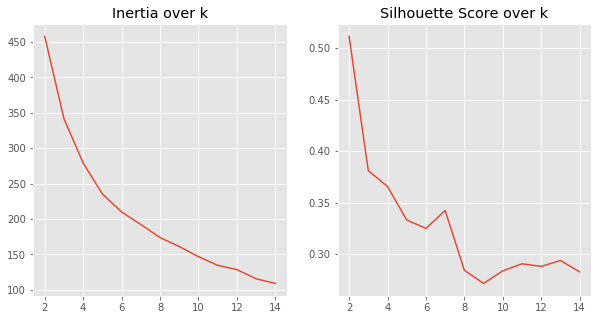

In [71]:
# Plot all inertia and silhouette scores for each k
plot_cluster_scores()

In [72]:
# Instantiate kmeans with 8 clusters, and set random state
kmeans = KMeans(n_clusters=8, random_state=42)
kmeans.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [73]:
# Cluster assignments
cluster_nums = kmeans.labels_

In [74]:
# Was receiving an error, so this reconciles the error when setting new column equal to new value
guard = guard.copy()

# Add new column `clusters` to DataFrame with corresponding cluster assignments for each player
guard.loc[:,'clusters'] = cluster_nums

In [75]:
# See position best performing to plot them below
guard_features

['AST', 'PTS', 'STL']

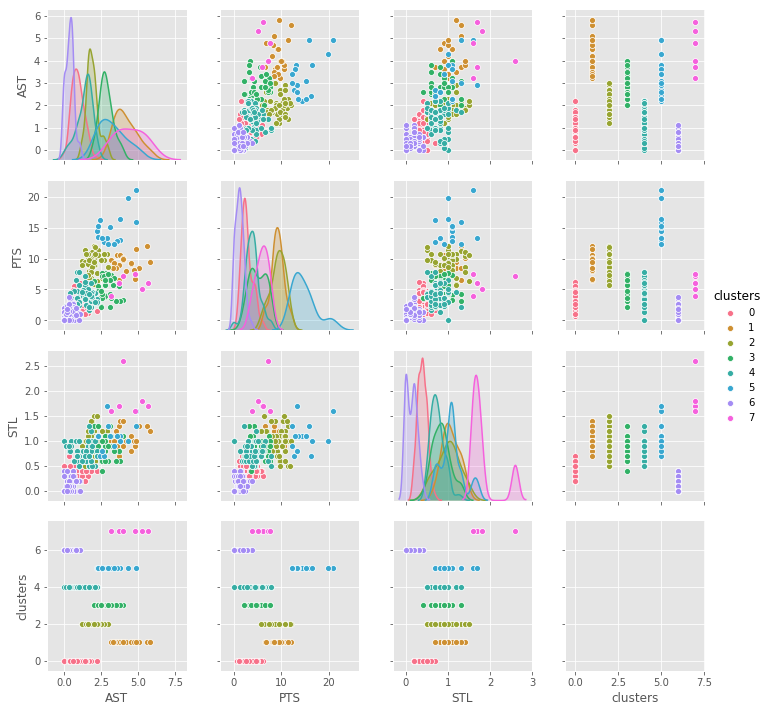

In [127]:
# View how clusters are divided
sns.pairplot(guard, vars=['AST', 'PTS', 'STL', 'clusters'], hue='clusters');

In [77]:
# View which players got sorted into clusters, according to `PTS` category
guard[['name', 'G','PTS', 'clusters']].sort_values('PTS', ascending=False).head(10)

,name,G,PTS,clusters
185,Cynthia Cooper,124,21.0,5
772,Diana Taurasi,431,19.8,5
640,Cappie Pondexter,416,16.4,5
34,Seimone Augustus,358,16.3,5
217,Skylar Diggins-Smith,168,15.9,5
516,Kayla McBride,139,15.3,5
484,Jewell Loyd,136,15.1,5
213,Diamond DeShields,34,14.4,5
348,Tiffany Hayes,216,13.5,5
729,Katie Smith,482,13.4,5


In [78]:
# Calculate average performance for players in each cluster, and compare how each cluster of players perform
guard_centroids = get_centroids(guard_features, 'mean')

In [79]:
# Show DataFrame
guard_centroids

,AST,PTS,STL,mean,median
5,3.262500,14.843750,1.100000,6.402083,4.832292
1,4.185714,9.242857,1.071429,4.833333,4.509524
2,1.937778,9.300000,1.000000,4.079259,3.008519
7,4.450000,5.950000,1.833333,4.077778,4.263889
3,2.848571,5.077143,0.848571,2.924762,2.886667
4,1.400000,3.900000,0.752941,2.017647,1.708824
0,0.938462,2.778022,0.391209,1.369231,1.153846
6,0.387013,1.196104,0.135065,0.572727,0.479870


The ranking of mean and median values for each cluster varies too much! Cluster 5 ranks as third best in median values, but ranks as FIRST best in mean values. When looking at the pairplot above, cluster 5 does significantly better than cluster 7 (which ranked number 1 in median values) in the `PTS` category. Also, cluster 5 and cluster 7 perform similarly in the `STL` category, but cluster 7 has only one outlier that out-performs cluster 5 in the `STL` category. Cluster 5 performs much, much better in `PTS` than cluster 7. So, considering all of this, I'm going to rank Guard clusters according to their mean values, and not their median values. 

In [80]:
# Re-assign cluster numbers according to performance, ranking 1 being best and 8 being worst
guard['ranking'] = guard['clusters'].map({5:1, 1:2, 2:3, 7:4, 3:5, 4:6, 0:7, 6:8})

In [81]:
# Sneak preview of which players made the top cut in this position
guard[['name', 'G', 'PTS', 'ranking']].sort_values('ranking').head()

,name,G,PTS,ranking
729,Katie Smith,482,13.4,1
185,Cynthia Cooper,124,21.0,1
484,Jewell Loyd,136,15.1,1
329,Becky Hammon,450,13.0,1
753,Andrea Stinson,272,12.3,1


### Forward-Guard KMeans

In [82]:
# Scale data
X = forward_guard[forward_guard_features]
ss = StandardScaler()
X_scaled = ss.fit_transform(X)

In [83]:
# Get inertia and silhouette scores for various k-clusters
get_cluster_scores(X_scaled).sort_values('inertia', ascending=True).head(10)

,k,inertia,silhouette
12,14,7.034017,0.289341
11,13,7.927698,0.315387
10,12,8.641474,0.292460
9,11,9.872296,0.330325
8,10,11.170171,0.302171
7,9,12.243665,0.304293
6,8,13.970265,0.358978
5,7,16.477610,0.348055
4,6,19.575253,0.355117
3,5,25.084920,0.357119


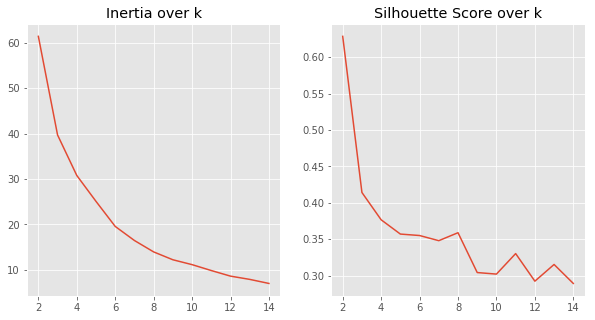

In [84]:
# Plot all inertia and silhouette scores for each k
plot_cluster_scores()

In [85]:
# Instantiate kmeans with 8 clusters, and set random state
kmeans = KMeans(n_clusters=8, random_state=42)
kmeans.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [86]:
# Cluster assignments
cluster_nums = kmeans.labels_

In [87]:
# Was receiving an error, so this reconciles the error when setting new column equal to new value
forward_guard = forward_guard.copy()

# Add new column `clusters` to DataFrame with corresponding cluster assignments for each player
forward_guard.loc[:,'clusters'] = cluster_nums

In [88]:
# See position best performing to plot them below
forward_guard_features

['AST', 'PTS', 'STL']

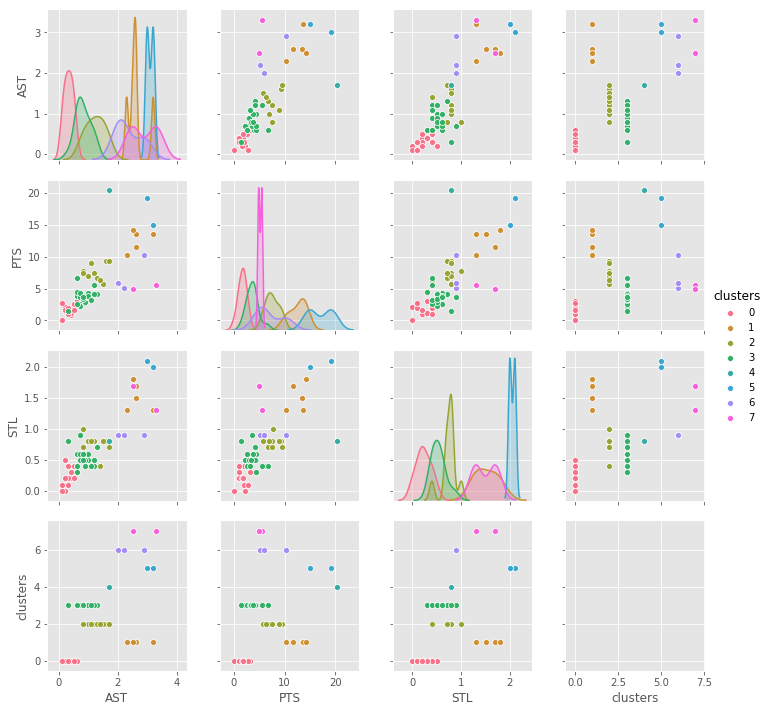

In [123]:
# View how clusters are divided
sns.pairplot(forward_guard, vars=['AST', 'PTS', 'STL', 'clusters'], hue='clusters');

In [90]:
# View which players got sorted into clusters, according to `PTS` category
forward_guard[['name', 'G','PTS', 'clusters']].sort_values('PTS', ascending=False).head(10)

,name,G,PTS,clusters
211,Elena Delle Donne,159,20.4,4
523,Angel McCoughtry,285,19.2,5
765,Sheryl Swoopes,324,15.0,5
689,Nykesha Sales,278,14.2,1
591,Deanna Nolan,293,13.6,1
227,Katie Douglas,412,13.5,1
55,Alana Beard,404,11.6,1
418,Vickie Johnson,410,10.3,6
690,Sheri Sam,328,10.2,1
146,Iziane Castro Marques,306,9.4,2


In [91]:
# Calculate average performance for players in each cluster, and compare how each cluster of players perform
forward_guard_centroids = get_centroids(forward_guard_features, 'median')

In [92]:
# Show DataFrame
forward_guard_centroids

,AST,PTS,STL,mean,median
5,3.100000,17.100000,2.050000,7.416667,5.258333
4,1.700000,20.400000,0.800000,7.633333,4.666667
1,2.640000,12.620000,1.520000,5.593333,4.116667
7,2.900000,5.200000,1.500000,3.200000,3.050000
6,2.366667,7.100000,0.900000,3.455556,2.911111
2,1.240000,7.610000,0.750000,3.200000,2.220000
3,0.826316,3.663158,0.536842,1.675439,1.250877
0,0.333333,1.693333,0.233333,0.753333,0.543333


The rankings here are tricky. The median and mean rankings differ, and the difference between the two is significant. Cluster 4 consists of a single person, Elena Delle Donne, who was placed in a high ranking cluster because she's an outlier in points-per-game. However, when looking at the performance of cluster 1, they outperform Della in two of the three categories. So I'm going to swap rankings between these clusters. 

In [93]:
# Re-assign cluster numbers according to performance, ranking 1 being best and 8 being worst
forward_guard['ranking'] = forward_guard['clusters'].map({5:1, 1:2, 4:3, 7:4, 6:5, 2:6, 3:7, 0:8})

In [94]:
# Sneak preview of which players made the top cut in this position
forward_guard[['name', 'G', 'PTS', 'ranking']].sort_values('ranking').head()

,name,G,PTS,ranking
765,Sheryl Swoopes,324,15.0,1
523,Angel McCoughtry,285,19.2,1
690,Sheri Sam,328,10.2,2
689,Nykesha Sales,278,14.2,2
55,Alana Beard,404,11.6,2


# Merge DataFrames to View New Data Generated: `wnba_all`

In [95]:
# Merge DataFrames that show clusters and rankings
wnba_all = pd.concat([forward_guard, guard, center, forward_center, forward])

# View shape
wnba_all.shape

# Inspect head
wnba_all.sort_values('ranking').head(10)

,name,position,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,clusters,ranking
106,Cindy Brown,Forward,60,51,26.9,3.1,7.4,0.410,0.5,1.7,0.277,2.6,5.8,0.449,2.3,3.3,0.708,2.0,5.5,7.5,1.4,1.4,0.6,1.9,2.8,8.9,2,1
185,Cynthia Cooper,Guard,124,124,35.2,6.5,14.1,0.459,1.9,5.1,0.377,4.5,9.0,0.505,6.1,7.0,0.871,0.8,2.5,3.3,4.9,1.6,0.3,3.4,2.1,21.0,5,1
613,Candace Parker,Forward-Center,293,289,31.6,6.6,13.6,0.483,0.8,2.3,0.339,5.8,11.3,0.512,3.6,4.7,0.761,1.6,7.1,8.7,3.9,1.4,1.7,2.7,2.1,17.5,2,1
750,Breanna Stewart,Forward,101,101,33.1,6.9,14.2,0.489,1.5,4.1,0.376,5.4,10.1,0.534,4.6,5.7,0.813,1.3,7.5,8.8,2.9,1.2,1.6,2.2,2.6,20.0,2,1
599,Nneka Ogwumike,Forward,218,217,29.4,6.3,11.3,0.558,0.2,0.6,0.360,6.1,10.7,0.570,3.5,4.2,0.837,2.3,5.3,7.6,1.9,1.5,0.7,1.7,2.9,16.4,2,1
523,Angel McCoughtry,Forward-Guard,285,238,28.9,6.7,15.7,0.425,0.8,2.9,0.286,5.8,12.8,0.456,5.0,6.3,0.798,1.6,3.5,5.1,3.0,2.1,0.6,3.2,2.8,19.2,5,1
393,Lauren Jackson,Forward-Center,317,317,32.0,6.6,14.3,0.460,1.4,3.9,0.351,5.2,10.4,0.501,4.4,5.2,0.842,2.2,5.5,7.7,1.4,1.1,1.8,1.7,3.1,18.9,2,1
366,Chamique Holdsclaw,Forward,279,252,32.9,6.5,14.8,0.443,0.3,1.0,0.262,6.3,13.7,0.457,3.6,4.5,0.794,2.2,5.4,7.6,2.5,1.3,0.5,2.8,2.4,16.9,2,1
409,Glory Johnson,Forward,176,145,28.9,4.5,10.0,0.452,0.2,0.8,0.305,4.3,9.2,0.465,3.4,4.6,0.739,2.6,5.5,8.1,1.3,1.3,0.5,2.0,2.7,12.7,2,1
425,Jonquel Jones,Forward,102,56,21.0,4.1,7.5,0.539,0.8,1.9,0.439,3.2,5.6,0.573,2.3,3.1,0.764,2.5,4.5,7.0,1.3,0.6,1.3,1.3,2.8,11.3,2,1


In [96]:
#wnba_all.to_csv('./data/wnba_all_rankings.csv')

# The Results! Let's See the Team Rosters.

Remember, I found the best performance metrics for each position, and clustered players into teams according to how well they performed given their position's best qualities. No player was placed in a team based on only one quality. Therefore, if you see a well-known, all-start player who's not on the best team (Team 1), that's because they didn't perform well overall when taking into consideration multiple qualities. For example, when clustering the Forward-Guard players, Elena Delle Donne had the highest points-per-game average amongst all players in that position. But she didn't perform as well as other Forward Guards when it came to Steals and Assists. Forward-Guards overall tended to perform better than all other positions when it came to Points, Steals, and Assists. So, the players were categorized into teams based on multiple features. 

Here's how they all got placed!

### Function

In [97]:
# Get Players and Position Numbers
def get_team_info(ranking):
    # Create cluster DataFrame
    team = wnba_all[wnba_all['ranking'] == ranking]

    # How many players in the cluster
    print(f'There are {len(team.index)} players in Team {ranking}')

    # Number of players in each position
    print(team['position'].value_counts())
    return team

### Team 1: The Best

In [98]:
team_1 = get_team_info(1)
team_1.sort_values('BLK', ascending=False).head()

There are 35 players in Team 1
Guard             16
Forward           12
Center             3
Forward-Guard      2
Forward-Center     2
Name: position, dtype: int64


,name,position,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,clusters,ranking
315,Brittney Griner,Center,181,181,30.2,6.4,11.4,0.561,0.0,0.0,0.250,6.4,11.4,0.561,3.9,4.9,0.797,1.6,5.7,7.4,1.5,0.5,3.2,2.1,3.2,16.7,6,1
233,Margo Dydek,Center,323,301,24.4,3.7,8.0,0.467,0.1,0.2,0.295,3.7,7.8,0.472,2.4,3.0,0.791,1.1,5.5,6.6,1.6,0.5,2.7,2.3,2.9,10.0,6,1
467,Lisa Leslie,Center,363,361,32.0,6.4,13.7,0.470,0.3,1.1,0.316,6.1,12.6,0.483,4.1,5.9,0.695,2.4,6.7,9.1,2.4,1.4,2.3,3.3,3.8,17.3,6,1
393,Lauren Jackson,Forward-Center,317,317,32.0,6.6,14.3,0.460,1.4,3.9,0.351,5.2,10.4,0.501,4.4,5.2,0.842,2.2,5.5,7.7,1.4,1.1,1.8,1.7,3.1,18.9,2,1
613,Candace Parker,Forward-Center,293,289,31.6,6.6,13.6,0.483,0.8,2.3,0.339,5.8,11.3,0.512,3.6,4.7,0.761,1.6,7.1,8.7,3.9,1.4,1.7,2.7,2.1,17.5,2,1


In [99]:
# Team 1 Roster (I'll only show rosters for teams 1 and 2)
team_1_players = str(list(team_1['name']))
team_1_players

"['Angel McCoughtry', 'Sheryl Swoopes', 'Seimone Augustus', 'Cynthia Cooper', 'Diamond DeShields', 'Skylar Diggins-Smith', 'Becky Hammon', 'Tiffany Hayes', 'Jewell Loyd', 'Kayla McBride', 'Kelsey Mitchell', 'Cappie Pondexter', 'Epiphanny Prince', 'Odyssey Sims', 'Katie Smith', 'Andrea Stinson', 'Diana Taurasi', 'Kristi Toliver', 'Margo Dydek', 'Brittney Griner', 'Lisa Leslie', 'Lauren Jackson', 'Candace Parker', 'Cindy Brown', 'Rebekkah Brunson', 'Tamika Catchings', 'Candice Dupree', 'Cheryl Ford', 'Chamique Holdsclaw', 'Glory Johnson', 'Jonquel Jones', 'Sancho Lyttle', 'Chiney Ogwumike', 'Nneka Ogwumike', 'Breanna Stewart']"

### Team 2: Second Best

In [100]:
team_2 = get_team_info(2)
team_2.sort_values('PTS', ascending=False).head()

There are 56 players in Team 2
Guard             21
Forward           20
Forward-Center     6
Forward-Guard      5
Center             4
Name: position, dtype: int64


,name,position,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,clusters,ranking
878,A'ja Wilson,Center,33,33,30.6,7.4,16.1,0.462,0.0,0.0,0.000,7.4,16.1,0.462,5.8,7.5,0.774,2.0,6.0,8.0,2.2,0.8,1.7,1.4,2.1,20.7,1,2
560,Maya Moore,Forward,271,271,31.2,6.6,14.5,0.453,2.0,5.1,0.384,4.6,9.4,0.491,3.3,3.8,0.860,1.7,4.2,5.9,3.3,1.7,0.6,1.9,2.5,18.4,5,2
155,Tina Charles,Center,297,297,32.6,7.4,16.2,0.457,0.2,0.8,0.322,7.2,15.5,0.464,3.2,4.1,0.763,2.8,6.9,9.7,2.2,0.8,1.1,2.3,2.0,18.3,1,2
130,Liz Cambage,Center,85,59,24.7,6.1,10.9,0.561,0.1,0.5,0.286,6.0,10.4,0.574,4.6,6.1,0.764,2.1,5.3,7.4,1.3,0.6,1.5,2.7,2.8,17.0,1,2
265,Sylvia Fowles,Center,306,297,30.7,6.2,10.5,0.593,0.0,0.0,1.000,6.2,10.5,0.593,3.6,5.0,0.730,2.9,7.0,9.9,1.1,1.2,1.9,2.4,2.6,16.1,1,2


In [101]:
# Team 2 Roster (I'll only show rosters for teams 1 and 2)
team_2_players = str(list(team_2['name']))
team_2_players.replace("\'", "")

'[Alana Beard, Katie Douglas, Deanna Nolan, Nykesha Sales, Sheri Sam, Jennifer Azzi, Sue Bird, Brittany Boyd, Chelsea Gray, Lindsey Harding, Briann January, Moriah Jefferson, Shannon Johnson, Temeka Johnson, Suzie McConnell Serio, Renee Montgomery, Kelsey Plum, Samantha Prahalis, Danielle Robinson, Dawn Staley, Nikki Teasley, Jasmine Thomas, Penny Toler, Courtney Vandersloot, Lindsay Whalen, Erica Wheeler, Liz Cambage, Tina Charles, Sylvia Fowles, "Aja Wilson", Erika de Souza, Isabelle Fijalkowski, Yolanda Griffith, Crystal Langhorne, Taj McWilliams-Franklin, Elizabeth Williams, Elena Baranova, DeWanna Bonner, Janice Braxton, Jessica Breland, Vicky Bullett, Swin Cash, Sylvia Crawley, Kristin Folkl, Adrienne Goodson, Asjha Jones, Erlana Larkins, Emma Meesseman, DeLisha Milton-Jones, Maya Moore, Wendy Palmer, Tamika Raymond, Brandy Reed, Alyssa Thomas, Tina Thompson, Sophia Young-Malcolm]'

### Team 3: Third Best

In [102]:
team_3 = get_team_info(3)
team_3.sort_values('PTS', ascending=False).head()

There are 131 players in Team 3
Forward           52
Guard             45
Center            21
Forward-Center    12
Forward-Guard      1
Name: position, dtype: int64


,name,position,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,clusters,ranking
211,Elena Delle Donne,Forward-Guard,159,152,31.4,6.9,14.8,0.466,1.4,3.7,0.387,5.4,11.0,0.493,5.2,5.6,0.934,1.6,5.1,6.7,1.7,0.8,1.6,1.2,1.8,20.4,4,3
289,Jennifer Gillom,Forward-Center,216,193,27.3,4.9,11.4,0.426,0.7,2.2,0.325,4.1,9.2,0.450,3.0,3.9,0.759,1.3,3.2,4.5,1.2,1.0,0.5,2.0,2.9,13.4,1,3
868,Natalie Williams,Center,221,219,31.1,4.8,10.2,0.474,0.0,0.1,0.286,4.8,10.1,0.476,3.4,4.6,0.741,3.3,5.0,8.3,1.4,1.2,0.6,2.2,3.8,13.1,5,3
775,Penny Taylor,Forward,355,277,26.8,4.4,9.4,0.466,1.2,3.0,0.382,3.2,6.4,0.506,3.0,3.5,0.868,1.2,3.2,4.4,3.0,1.4,0.4,2.0,2.4,13.0,7,3
466,Betty Lennox,Guard,320,215,24.6,4.4,10.8,0.406,1.2,3.5,0.335,3.2,7.4,0.440,2.1,2.5,0.838,1.0,3.1,4.1,2.0,1.0,0.1,2.5,2.7,12.1,2,3


### Team 4: Fourth Best

In [103]:
team_4 = get_team_info(4)
team_4.sort_values('PTS', ascending=False).head()

There are 111 players in Team 4
Forward           69
Center            20
Forward-Center    14
Guard              6
Forward-Guard      2
Name: position, dtype: int64


,name,position,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,clusters,ranking
677,Crystal Robinson,Forward,245,206,30.1,3.6,8.5,0.427,1.7,4.6,0.374,1.9,3.8,0.490,1.2,1.5,0.850,0.8,2.0,2.7,2.0,1.1,0.3,1.2,2.8,10.2,0,4
208,Clarissa Davis-Wrightsil,Forward,14,9,18.5,3.7,8.6,0.433,0.7,2.4,0.303,3.0,6.2,0.483,1.1,1.7,0.667,1.1,1.6,2.7,1.4,0.9,0.3,1.6,2.8,9.3,0,4
199,Stacey Dales,Forward,150,131,25.9,3.1,8.1,0.380,1.6,4.5,0.348,1.5,3.6,0.420,1.5,2.0,0.739,0.7,1.5,2.2,2.7,0.6,0.1,1.8,2.2,9.2,0,4
799,Elena Tornikidou,Forward,75,64,23.1,3.2,6.8,0.472,0.3,0.8,0.404,2.9,6.1,0.480,2.0,2.3,0.882,1.0,1.7,2.6,1.9,0.7,0.4,1.8,1.9,8.8,0,4
250,Allison Feaster,Forward,284,156,22.2,2.6,6.9,0.378,1.3,3.8,0.344,1.3,3.1,0.421,1.4,1.7,0.835,0.8,1.6,2.4,1.4,0.8,0.2,1.3,1.8,8.0,0,4


### Team 5: Fifth Best

In [104]:
team_5 = get_team_info(5)
team_5.sort_values('PTS', ascending=False).head()

There are 102 players in Team 5
Guard             35
Center            26
Forward           25
Forward-Center    13
Forward-Guard      3
Name: position, dtype: int64


,name,position,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,clusters,ranking
418,Vickie Johnson,Forward-Guard,410,408,30.3,4.0,9.2,0.431,0.7,2.0,0.358,3.2,7.2,0.452,1.7,2.1,0.821,1.2,2.8,4.0,2.9,0.9,0.1,1.6,1.8,10.3,6,5
906,Haixia Zheng,Center,34,23,19.3,3.8,6.2,0.619,0.0,0.0,0.000,3.8,6.2,0.619,1.3,1.9,0.667,1.2,3.2,4.4,0.6,0.3,0.6,1.5,2.6,8.9,4,5
461,Jantel Lavender,Center,265,75,20.3,3.7,7.3,0.509,0.0,0.2,0.255,3.7,7.1,0.516,1.1,1.3,0.814,1.4,3.2,4.6,1.0,0.4,0.6,1.3,1.5,8.6,4,5
503,Rhonda Mapp,Center,163,97,21.2,3.3,6.9,0.479,0.1,0.3,0.264,3.2,6.6,0.490,1.7,2.2,0.768,1.6,3.3,4.8,1.5,0.7,0.4,1.6,3.0,8.4,4,5
84,Kelsey Bone,Center,168,84,19.6,3.5,7.4,0.470,0.0,0.1,0.167,3.5,7.3,0.476,1.1,1.7,0.634,1.4,3.2,4.6,1.2,0.5,0.3,1.6,2.5,8.1,4,5


### Team 6: Sixth Best

In [105]:
team_6 = get_team_info(6)
team_6.sort_values('PTS', ascending=False).head()

There are 191 players in Team 6
Guard             68
Forward           50
Center            42
Forward-Center    21
Forward-Guard     10
Name: position, dtype: int64


,name,position,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,clusters,ranking
146,Iziane Castro Marques,Forward-Guard,306,203,21.8,3.4,8.5,0.399,0.9,2.8,0.319,2.5,5.7,0.438,1.6,2.3,0.726,0.5,1.5,2.0,1.7,0.7,0.1,1.7,1.6,9.4,2,6
67,Agnieszka Bibrzycka,Forward-Guard,56,31,21.7,3.3,8.3,0.400,1.4,4.3,0.336,1.9,3.9,0.471,1.2,1.4,0.873,0.3,1.4,1.7,1.6,0.8,0.3,1.4,1.6,9.3,2,6
645,Aerial Powers,Forward-Guard,68,3,17.7,2.8,7.3,0.381,0.8,2.5,0.329,1.9,4.7,0.408,2.6,3.1,0.839,0.9,2.1,3.0,1.1,0.8,0.3,1.5,1.8,9.0,2,6
909,Shanna Zolman,Guard,117,18,16.3,2.8,7.1,0.399,1.7,4.2,0.408,1.1,2.9,0.386,0.6,0.7,0.807,0.2,1.0,1.2,1.0,0.5,0.1,1.1,0.9,7.9,4,6
791,Robin Threatt-Elliott,Guard,20,7,18.9,3.0,7.9,0.382,0.6,1.9,0.324,2.4,6.0,0.400,1.2,1.8,0.657,0.5,1.1,1.6,0.9,0.7,0.2,1.5,1.8,7.8,4,6


### Team 7: Seventh Best

In [106]:
team_7 = get_team_info(7)
team_7.sort_values('PTS', ascending=False).head()

There are 159 players in Team 7
Guard             91
Center            29
Forward-Guard     19
Forward           19
Forward-Center     1
Name: position, dtype: int64


,name,position,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,clusters,ranking
186,Kahleah Copper,Forward-Guard,97,15,15.4,2.4,5.6,0.426,0.5,1.3,0.375,1.9,4.3,0.442,1.4,1.8,0.791,0.4,2.0,2.4,0.6,0.4,0.1,1.0,1.6,6.7,3,7
404,Anete Jekabsone-Zogota,Guard,78,30,17.1,2.3,5.9,0.387,1.0,2.9,0.360,1.3,3.0,0.414,0.6,0.7,0.887,0.2,1.5,1.7,1.6,0.3,0.1,1.2,1.7,6.2,0,7
364,Roneeka Hodges,Guard,320,136,18.4,2.1,5.6,0.379,1.2,3.5,0.344,0.9,2.0,0.439,0.6,0.7,0.803,0.4,1.5,1.8,1.1,0.4,0.2,0.8,1.0,6.0,0,7
407,Adrienne Johnson,Guard,181,38,16.8,2.3,5.6,0.410,0.6,1.7,0.343,1.7,3.9,0.438,0.5,0.6,0.783,0.6,1.0,1.6,0.7,0.4,0.1,0.9,1.1,5.6,0,7
206,Kaela Davis,Forward-Guard,60,6,16.1,2.0,5.3,0.370,0.4,1.3,0.329,1.6,4.1,0.383,1.2,1.7,0.712,0.4,1.3,1.7,1.2,0.4,0.1,1.4,1.9,5.6,3,7


### Team 8: Eighth Best

In [107]:
team_8 = get_team_info(8)
team_8.sort_values('PTS', ascending=False).head()

There are 123 players in Team 8
Guard             77
Forward           16
Forward-Guard     15
Center            12
Forward-Center     3
Name: position, dtype: int64


,name,position,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,clusters,ranking
375,Andrea Hoover,Guard,12,1,14.3,1.3,3.9,0.319,0.7,2.3,0.286,0.6,1.6,0.368,0.6,0.6,1.000,0.3,1.0,1.3,0.3,0.2,0.1,0.7,1.5,3.8,6,8
46,LaQuanda Barksdale,Guard,48,3,10.2,1.2,4.0,0.305,0.4,1.6,0.260,0.8,2.4,0.336,0.5,0.6,0.893,0.6,1.1,1.6,0.4,0.2,0.2,0.7,1.1,3.4,6,8
767,April Sykes,Forward-Guard,30,0,8.6,1.1,2.9,0.379,0.6,1.6,0.375,0.5,1.3,0.385,0.3,0.5,0.533,0.3,0.9,1.1,0.6,0.3,0.1,0.5,0.9,3.1,0,8
194,Beth Cunningham,Guard,21,0,9.4,0.8,3.2,0.250,0.4,1.8,0.243,0.4,1.5,0.258,0.8,0.9,0.842,0.2,0.8,1.0,0.6,0.1,0.0,0.6,1.1,2.8,6,8
15,Charel Allen,Guard,6,0,8.2,1.2,2.7,0.438,0.3,1.0,0.333,0.8,1.7,0.500,0.0,0.0,0.000,0.3,0.7,1.0,0.5,0.2,0.0,1.0,0.8,2.7,6,8


# Let the Ultimate WNBA (Data-Driven) Game Begin! 
## (Or, what it would look like if the top 2 teams played against each other)

### Function

In [108]:
# Get Histogram and mean/median performance of teams playing against each other
def get_playoff(feature, feature_title):
    # Histogram to see distribution of games played per player, per team
    fig, axes = plt.subplots(1, 2, figsize=(18, 6))
    axes[0].hist(team_1[feature], color='m')
    axes[0].set_title(f'Team 1: Average {feature_title} Distribution per Player')
    axes[0].set_xlabel(f'Avg {feature_title} per Game')
    axes[0].set_ylabel('# of Players')
    axes[1].hist(team_2[feature], color='c')
    axes[1].set_title(f'Team 2: Average {feature_title} Distribution per Player')
    axes[1].set_xlabel(f'Avg {feature_title} per Game')
    axes[1].set_ylabel('# of Players');

    # Compare mean and median offensive rebounds
    print('Team 1 mean {}: {}'.format(feature_title, round(team_1[feature].mean(),2)))
    print('Team 1 median {}: {}'.format(feature_title, round(team_1[feature].median(),2)))
    print("-"*65)
    # Compare mean and median offensive rebounds
    print('Team 2 mean {}: {}'.format(feature_title, round(team_2[feature].mean(),2)))
    print('Team 2 mean {}: {}'.format(feature_title, round(team_2[feature].median(),2)))

### Veteran Players On Each Team 
Which players have played the most WNBA games on each team? 

Team 1 mean Games Played: 256.11
Team 1 median Games Played: 272.0
-----------------------------------------------------------------
Team 2 mean Games Played: 244.27
Team 2 mean Games Played: 255.0


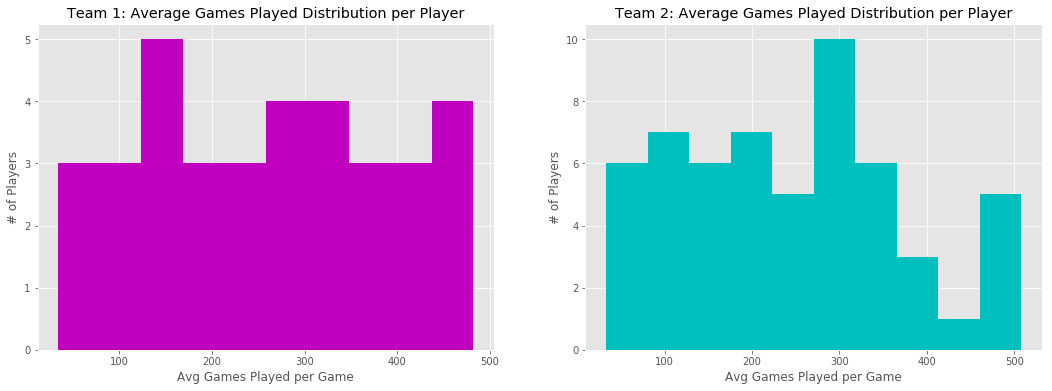

In [109]:
get_playoff('G', 'Games Played')

In [110]:
# Top 5 players on Team 1 who have played the most WNBA games 
team_1[['name','G']].sort_values('G', ascending=False).head()

,name,G
729,Katie Smith,482
147,Tamika Catchings,457
116,Rebekkah Brunson,453
329,Becky Hammon,450
772,Diana Taurasi,431


In [111]:
# Top 5 players on Team 2 who have played the most WNBA games 
team_2[['name','G']].sort_values('G', ascending=False).head()

,name,G
69,Sue Bird,508
543,DeLisha Milton-Jones,499
787,Tina Thompson,496
842,Lindsay Whalen,480
144,Swin Cash,479


Team 1 has more players who have played more than 400 games compared with Team 2 players, where only a few have played over 400 games. But Team 2 has more players who have played more games than Team 1 players. Team 1 has Katie Smith who has the played the most game on that team, 482. But Team 2 has three players who have surpassed 482 games: Tina Thompson at 496 games, DeLisha Milton-Jones at 499 games, and Sue Bird at 508 games. If you're wondering why Team 2 (second best team) has players who have played more games, that's because other performance metrics were taken into consideration when creating these ranked teams! 

### Which two players tip off the game?
Here, I just went with the players that had the most games started in their team.

In [112]:
# View most games started in team 1
team_1[['name', 'GS']].sort_values('GS', ascending=False).head(1)

,name,GS
147,Tamika Catchings,448


In [113]:
# View most games started in team 2
team_2[['name', 'GS']].sort_values('GS', ascending=False).head(1)

,name,GS
69,Sue Bird,508


### Offensive Rebounds
Which team is better at keeping the ball on their side?

Team 1 mean Offensive Rebounds: 1.43
Team 1 median Offensive Rebounds: 1.1
-----------------------------------------------------------------
Team 2 mean Offensive Rebounds: 1.32
Team 2 mean Offensive Rebounds: 1.35


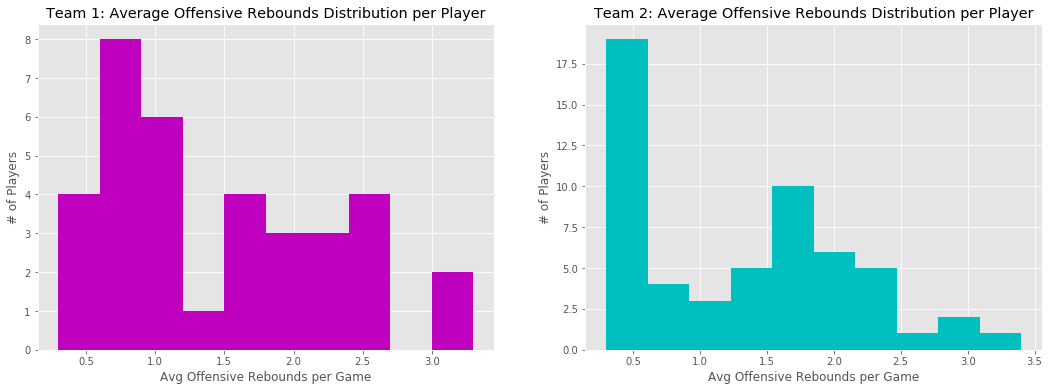

In [114]:
get_playoff('ORB', 'Offensive Rebounds')

Since Team 1's mean and median are different, and viewing the histogram shows me that the data is skewed, I'll go with the median for their team.

Team 2 players have a higher average offensive rebound rate per game. This means that Team 2 would have a higher liklihood of keeping the ball on their side when they play offense. However, a star player on Team 1 could outperform Team 2 on the offensive side. 

### Defensive Rebounds
Which team is better at taking the ball away from the offensive team?

Team 1 mean Defensive Rebounds: 4.08
Team 1 median Defensive Rebounds: 3.9
-----------------------------------------------------------------
Team 2 mean Defensive Rebounds: 3.32
Team 2 mean Defensive Rebounds: 3.05


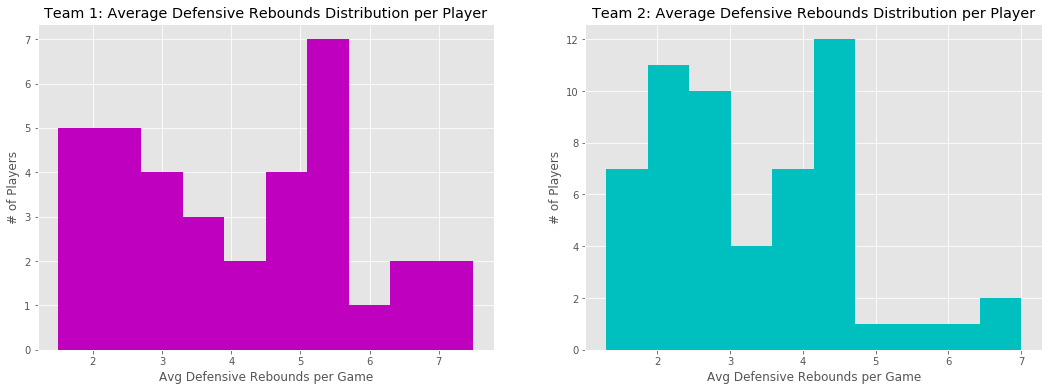

In [115]:
get_playoff('DRB', 'Defensive Rebounds')

Regardless of the mean or the median (if I were to choose both or either one), players on Team 1 would significantly outperformn Team 2 when it comes to defensive rebounds. 

### Three-Pointer Suspense: Which team makes the most three-pointers? 
This makes me wish I had a "swish" datapoint for each team so that I could calculate that too. 

Team 1 mean Three-Pointer %: 0.33
Team 1 median Three-Pointer %: 0.34
-----------------------------------------------------------------
Team 2 mean Three-Pointer %: 0.3
Team 2 mean Three-Pointer %: 0.32


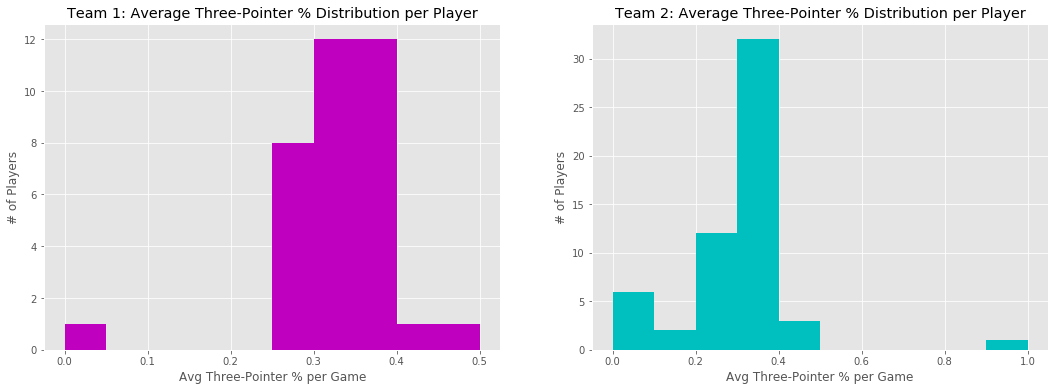

In [116]:
get_playoff('3P%', 'Three-Pointer %')

Whoah! Team 1's distribution of average 3-pointers made in a game is significantly skewed to the right! Team 1 is out here giving the crowd what they want, three-pointers that actually make it into the hoop. Looks like Team 2 has only one player to rely on to make the most successful three-pointers. Let's see who that player is. 

In [117]:
# Which player had the highest % of three-pointers made on Team 2?
team_2[['name','G','3PA','3P', '3P%']].sort_values('3P%', ascending=False).head(2)

,name,G,3PA,3P,3P%
265,Sylvia Fowles,306,0.0,0.0,1.000
39,Jennifer Azzi,141,2.4,1.1,0.458


Oh, Sylvia Fowles, a WNBA veteran, made 100% of her three-pointers, but this could be an error on basketball-reference. See [her page](https://www.basketball-reference.com/wnba/players/f/fowlesy01w.html) to view the potential error IRL. If that's an error, we'll go with Jennifer Azzi instead, who made 46% of three-pointer attempts per game. How does that compare to Team 1 though?

Update: I wrote to Basketball-Reference about the possible error and here's what they had to say (tl;dr: not an error): 
 - "So the issue is that she only attempted 1 3-pointer in 34 games that season, and made it. So while she was 100% on her 3-pointers that year, her 3PA per game was 0.03, which rounds down to 0.0 since we use to the nearest tenth in the per game table."

In [118]:
# Which player had the highest % of three-pointers made on Team 1?
team_1[['name','G','3PA','3P', '3P%']].sort_values('3P%', ascending=False).head(2)

,name,G,3PA,3P,3P%
598,Chiney Ogwumike,95,0.0,0.0,0.500
425,Jonquel Jones,102,1.9,0.8,0.439


Looks like Chiney Ogwumike has a higher % of three-pointer attempts than the Azzi. Nevertheless, a rate of over 40% of successfull three-pointers is pretty good. 

### And the Winner is...
Which team scored the highest points?

Team 1 mean Total Points Scored: 14.64
Team 1 median Total Points Scored: 14.7
-----------------------------------------------------------------
Team 2 mean Total Points Scored: 10.95
Team 2 mean Total Points Scored: 10.35


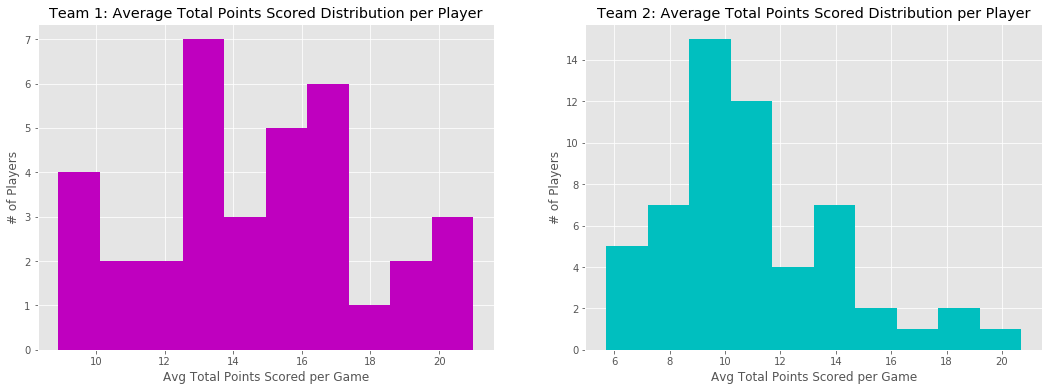

In [119]:
get_playoff('PTS', 'Total Points Scored')

Team 1 won this game! On average, players from Team 1 score 4 more points than players on Team 2. But both teams have high shooters, let's see who they are. 

In [120]:
# Top 5 players on Team 1 who have scored the most points per game 
team_1[['name','G','PTS']].sort_values('PTS', ascending=False).head()

,name,G,PTS
185,Cynthia Cooper,124,21.0
750,Breanna Stewart,101,20.0
772,Diana Taurasi,431,19.8
523,Angel McCoughtry,285,19.2
393,Lauren Jackson,317,18.9


In [121]:
# Top 5 players on Team 2 who have scored the most points per game 
team_2[['name','G','PTS']].sort_values('PTS', ascending=False).head()

,name,G,PTS
878,A'ja Wilson,33,20.7
560,Maya Moore,271,18.4
155,Tina Charles,297,18.3
130,Liz Cambage,85,17.0
265,Sylvia Fowles,306,16.1


Wow, something notable here is seeing A'ja Wilson, who's played a total of 33 games (sure, not nearly as many as the veteran players), but she deserves applause for having a pretty high points-per-game average. 